In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
%matplotlib inline


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os

In [3]:

dataset=pd.read_csv('C:/Users/Akhil.pathak/Downloads/Combined_v3.csv')
dataset.columns = dataset.columns.str.lower().str.replace(' ', '_')
dataset.head()
if set(['date']).issubset(dataset.columns):
    dataset.drop(['date'],axis=1, inplace=True)
    
#ds = dataset.sample(frac=1)
ds=dataset;
ds.head()

,voltage,current,percentage,data,xl1,yl1,xo1,yo1,zo1,wo1,...,zlt1,xlt2,ylt2,zlt2,xat,yat,zat,mean,std_dev,normality
0,16.423000,0.0,0.99,62.85,-0.137454,0.184408,-0.007621,-0.004687,-0.234685,-0.972030,...,-0.060465,0.160412,-0.003352,-0.059530,0.000214,0.000151,0.002010,683.112414,54530.25629,1
1,16.471001,0.0,0.99,62.86,-0.251003,0.336746,-0.007845,-0.004503,-0.234648,-0.972038,...,-0.063595,0.132592,-0.025489,-0.062490,-0.001187,-0.000858,-0.001256,683.082851,54142.71255,1
2,16.360001,0.0,0.99,62.86,-0.107573,0.144320,-0.008120,-0.004273,-0.234579,-0.972054,...,-0.067588,0.100023,-0.051094,-0.066241,0.001719,-0.001543,-0.001125,737.881533,53226.67170,1
3,16.364000,0.0,0.99,62.86,-0.155383,0.208462,-0.008404,-0.004010,-0.234530,-0.972064,...,-0.069535,0.078779,-0.058969,-0.068169,0.000330,0.000270,0.001531,655.660760,53701.55332,1
4,16.417999,0.0,0.99,62.86,-0.011953,0.016036,-0.008489,-0.003894,-0.234552,-0.972059,...,-0.069977,0.072535,-0.053505,-0.068748,0.000994,-0.000740,-0.003595,696.764383,54908.60053,1


In [4]:
x = ds.iloc[:,73:75]
xm = ds.iloc[:,73]
xs = ds.iloc[:,74]
y = ds.iloc[:,75:76]
y

,normality
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=100)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
plt.style.use('ggplot')

(165, 2) (165, 1)
(166, 2) (166, 1)


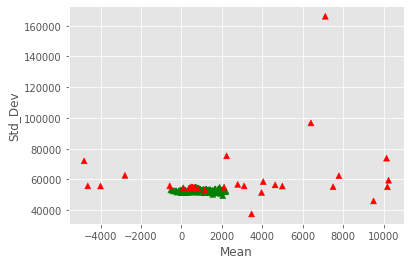

In [6]:
# Actual plot for normal and abnormal dataset
fig, ax = plt.subplots()
colors = {0:'red', 1:'green'}
ax.scatter(ds['mean'], ds['std_dev'], c=ds['normality'].apply(lambda x: colors[x]), marker = '^')
plt.xlabel('Mean')
plt.ylabel('Std_Dev')
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
from sklearn.cluster import KMeans
Kmean = KMeans(algorithm='auto',init='k-means++',n_clusters=6, max_iter=350)
Kmean.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=350,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [12]:
Kmean.cluster_centers_

array([[   995.32924276,  52272.25726584],
       [  7108.28047   , 166179.1643    ],
       [  2519.86599233,  73771.78878   ],
       [   775.31929348,  53990.0301522 ],
       [  6478.362577  ,  41777.91285   ],
       [  6974.18735683,  57965.58377   ]])

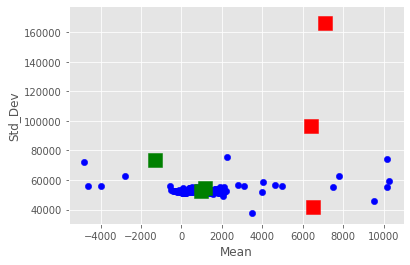

In [10]:
#plot after training.

plt.scatter(xm,xs, s =40, c='b')
plt.scatter( 977.57815414,  52412.05562598,s=200, c='g', marker='s')
plt.scatter(7108.28047   , 166179.1643,s=200, c='r', marker='s')
plt.scatter(-1287.9027215 ,  73729.80204,s=200, c='g', marker='s')
plt.scatter(6396.899247  ,  96787.10614,s=200, c='r', marker='s')
plt.scatter(1171.79450058,  54495.64416419,s=200, c='g', marker='s')
plt.scatter(6478.362577  ,  41777.91285,s=200, c='r', marker='s')
plt.xlabel('Mean')
plt.ylabel('Std_Dev')
plt.show()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=350,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)